<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage.util.shape import view_as_windows
import glob

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
activities = ['brush_teeth','drink_glass','climb_stairs','pour_water',
          'use_telephone','eat_meat','walk','comb_hair','eat_soup',
          'descend_stairs','getup_bed','sitdown_chair','liedown_bed','standup_chair']

def segment_file(d_input,w):
  window_shape = (32,3)  
  c = view_as_windows(d_input.values,window_shape)
  d = c[:w,:,:]
  return pd.DataFrame(d.reshape(w,96))

def loadall_and_slice(w):
  df = pd.DataFrame()
  fid = 0
  feature = 0
  for fol in activities:
      print (fol)
      file_path = glob.glob('/content/gdrive/''My Drive''/aml-homeworks/homework5/HMP_Dataset/' + fol + '/*.txt')
      for file in file_path:
          temp_df=pd.read_csv(file, sep = " ", names=['a','b','c'])
          slice_df = segment_file(temp_df,w)
          slice_df['fid'] = fid
          slice_df['feature'] = feature
          df = df.append(slice_df) 
          fid += 1
      feature += 1
  return df

def compute_kmeans(k,df_input):
  return KMeans(n_clusters=k, random_state=0).fit(df_input.values[:,:96])

def compute_feature_vector(df_input,kmeans,k):
  unq = np.unique(kmeans.predict(df_input),return_counts=True)
  a = np.zeros((k,), dtype=int)
  for i in range(len(unq[1])):
    a[t[0][i]] = t[1][i]
  return a  

def plot_hist(feature):
  plt.bar(range(len(feature)), feature, width=5, label='0')
  plt.show()
  
  

##################################################################################
def train_and_predict(train,test,k):
  clf = RandomForestClassifier(n_estimator=10,max_depth=4,random_state=0)
  clf.fit(train[:,:k],train[:,-1])
  return clf.predict(test[:,:k])

def label_race(row):
  if row[0] == row[1]:
    return 1
  else:
    return 0

def compute_acc(df_original,df_predict):
  d = df_original.join(df_predict)
  d2 = d.apply (lambda row: label_race(row),axis=1)
  return d2[[1]].sum()/len(d2)
  
def consufion_matrix(df_original,df_predict):
  return pd.crosstab(df_original['Activities'], df_predict, rownames=['Actual Activities'], colnames=['Predicted Activities'])
   
def main_compute(k,w):
  total_df = loadall_and_slice(w)
  kmeans = compute_kmeans(k,total_df)
  #TODO: for each file - doing it for only 1 - need 32X32 sample here as well
  feature_vector = compute_feature_vector(df,kmeans)
  #2 - is index of climb_stairs in activies array - need code to dynamically index this.
  final_features = np.append(feature_vector,2)
  #TODO:
  #for each label(eg brush_teeth)
  train,test = train_test_split(final_features,test_size=0.33, random_state=10)
  predict  =  train_and_predict(train,test,k) 

In [0]:
df = pd.read_csv('/content/gdrive/''My Drive''/aml-homeworks/homework5/HMP_Dataset/climb_stairs/Accelerometer-2011-03-24-10-24-39-climb_stairs-f1.txt',delim_whitespace=True)


In [0]:
# def segment_file(d_input,w):
#   window_shape = (32,3)  
#   c = view_as_windows(d_input.values,window_shape)
#   d = c[:w,:,:]
#   return d.reshape(w,96)

In [30]:
d.reshape(32,96)

array([[ 2, 41, 34, ..., 18, 35, 35],
       [ 5, 39, 34, ..., 18, 36, 37],
       [12, 38, 34, ..., 17, 37, 35],
       ...,
       [14, 33, 32, ..., 15, 36, 30],
       [16, 35, 35, ..., 13, 38, 33],
       [18, 35, 35, ..., 13, 39, 32]])

In [93]:
d1 = loadall_and_slice(32)
#len(d1)

brush_teeth
drink_glass
climb_stairs
pour_water
use_telephone
eat_meat
walk
comb_hair
eat_soup
descend_stairs
getup_bed
sitdown_chair
liedown_bed
standup_chair


In [0]:
km = compute_kmeans(480,d1)

In [99]:
km
# d_t = segment_file(df,32)
# d_t


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=480, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
f_v = compute_feature_vector(d_t,km,480)


In [68]:
t = np.unique(f_v,return_counts=True)
t

(array([ 12,  40,  83,  98, 100, 112, 137, 149, 232, 258, 259, 301, 469],
       dtype=int32), array([2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3]))

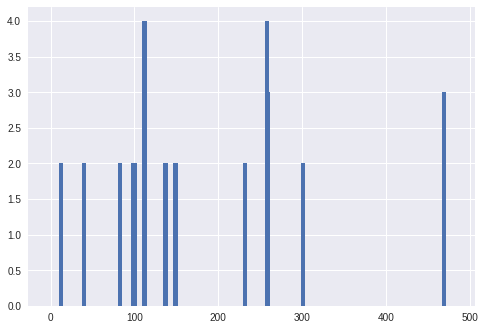

In [102]:
plot_hist(f_v)